<a href="https://colab.research.google.com/github/Yuvraj-Jaiswal/CNN-Working-Visualization/blob/main/CNN_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers \
    import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

(x_train , y_train) , (x_test , y_test) = mnist.load_data()

single_image = x_train[0]
#plt.imshow(single_image , cmap='binary')

y_train_mat = to_categorical(y_train , 10)
y_test_mat = to_categorical(y_test , 10)

x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


#    WITH MAXPOOLING **LAYERS**

In [ ]:

Cnn_ModelV1 = Sequential()
Cnn_ModelV1.add(Conv2D(32 , (3,3) , input_shape=(28,28,1) , activation='relu' , padding='same'))
Cnn_ModelV1.add(MaxPool2D())

Cnn_ModelV2 = Sequential()
Cnn_ModelV2.add(Conv2D(64 , (3,3)  , input_shape=(14,14,32), activation='relu' , padding='same'))
Cnn_ModelV2.add(MaxPool2D())

Cnn_ModelV3 = Sequential()
Cnn_ModelV3.add(Conv2D(128 , (3,3), input_shape=(7,7,64) , activation='relu' , padding='same'))

Cnn_Model = Sequential()
Cnn_Model.add(Flatten())
Cnn_Model.add(Dense(128 , activation='relu'))
Cnn_Model.add(Dense(64 , activation='relu'))
Cnn_Model.add(Dense(10 , activation='softmax'))
Cnn_Model.compile(optimizer='adam' , loss='categorical_crossentropy' ,metrics=['accuracy'])


Visualizer = Sequential([Cnn_ModelV1,Cnn_ModelV2,Cnn_ModelV3,Cnn_Model])
Visualizer.compile(optimizer='adam' , loss='categorical_crossentropy' ,metrics=['accuracy'])

Visualizer.fit(x_train , y_train_mat , epochs=10 , validation_data=(x_test,y_test_mat))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1261 - accuracy: 0.9606 - val_loss: 0.0628 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0330 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0345 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0284 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0305 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0302 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0275 - val_accuracy:

In [ ]:
Cnn_featureMap_L1 = Cnn_ModelV1.predict(x_train[0].reshape(1,28,28,1))
Cnn_featureMap_L2 = Cnn_ModelV2.predict(Cnn_featureMap_L1)
Cnn_featureMap_L3 = Cnn_ModelV3.predict(Cnn_featureMap_L2)

print(Cnn_featureMap_L1.shape)
print(Cnn_featureMap_L2.shape)
print(Cnn_featureMap_L3.shape)

(1, 14, 14, 32)
(1, 7, 7, 64)
(1, 7, 7, 128)



Cnn Map images layer 1



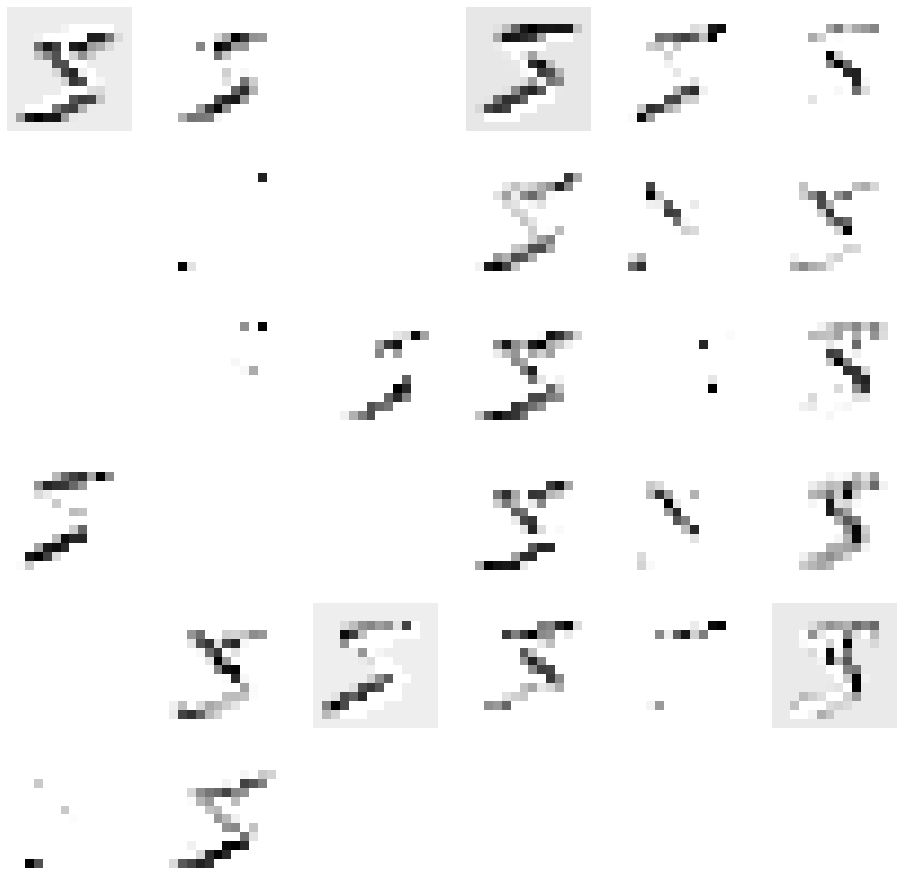

In [ ]:
print("")
print("Cnn Map images layer 1")
print("")

plt.figure(figsize=(16,16))
for i in range(32):
  plt.subplot(6,6,i+1)
  plt.imshow(Cnn_featureMap_L1[:,:,:,i].reshape(14,14),cmap='binary')
  plt.axis('off')
plt.show()


Cnn Map images layer 2



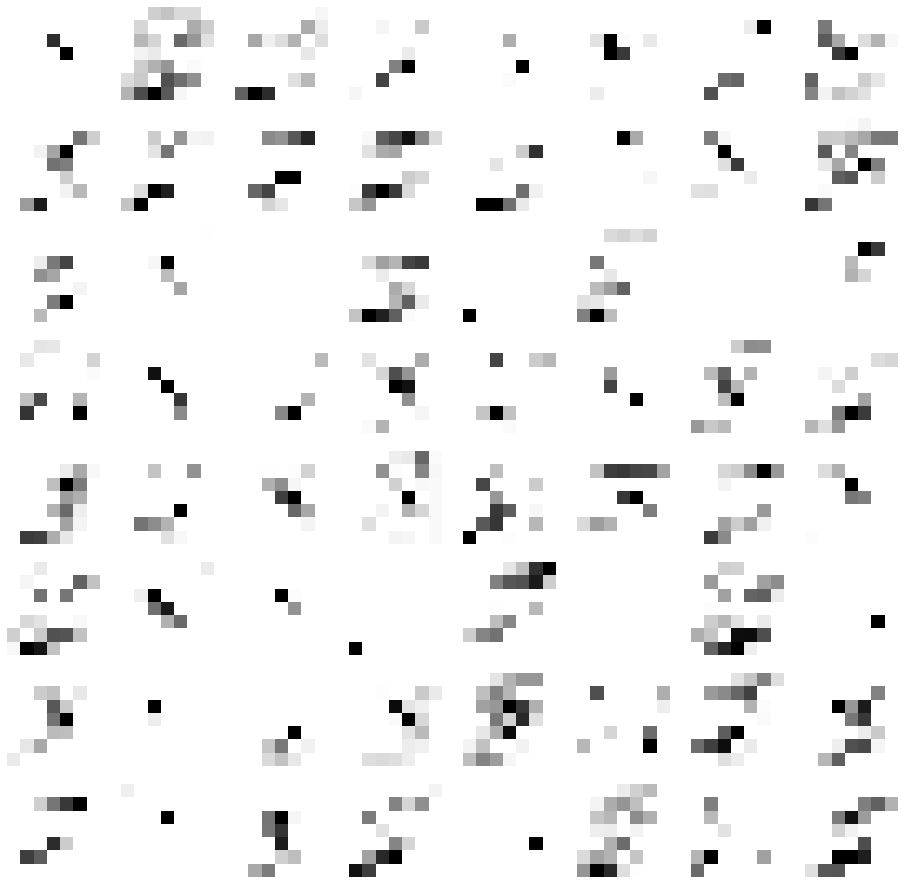

In [ ]:
print("")
print("Cnn Map images layer 2")
print("")

plt.figure(figsize=(16,16))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(Cnn_featureMap_L2[:,:,:,i].reshape(7,7),cmap='binary')
  plt.axis('off')
plt.show()


Cnn Map images layer 3



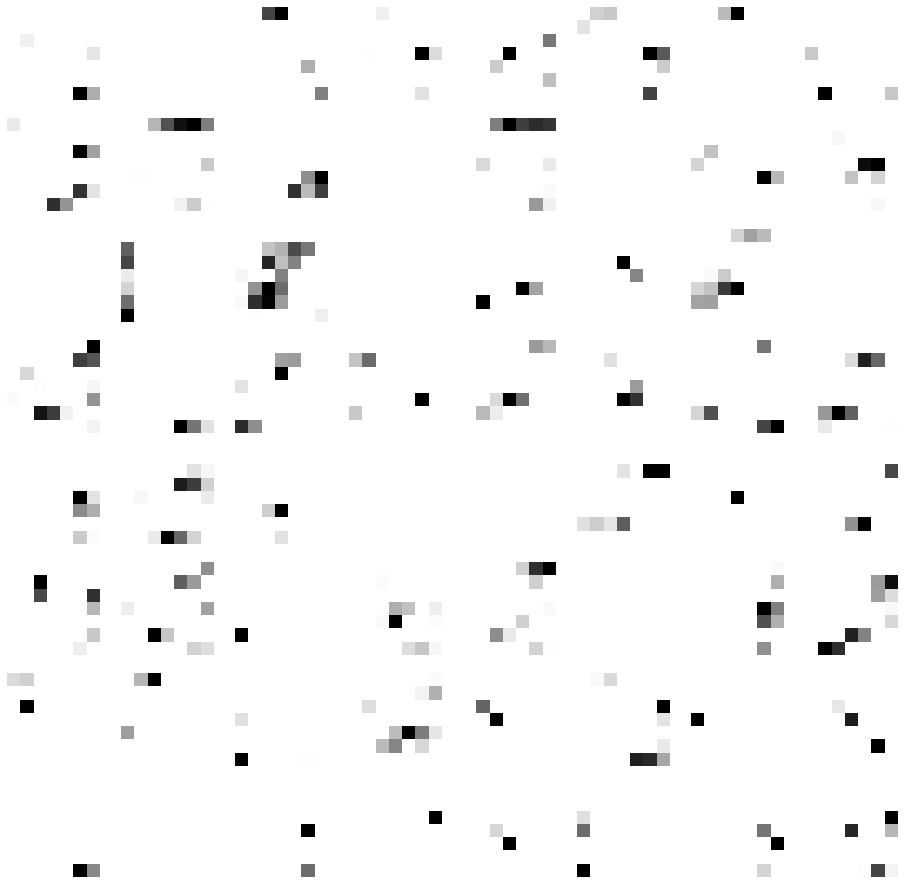

In [ ]:
print("")
print("Cnn Map images layer 3")
print("")

plt.figure(figsize=(16,16))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(Cnn_featureMap_L3[:,:,:,i].reshape(7,7),cmap='binary')
  plt.axis('off')
plt.show()

# **WITHOUT MAXPOOLING LAYERS**

In [ ]:

Cnn_ModelV1 = Sequential()
Cnn_ModelV1.add(Conv2D(32 , (3,3) , input_shape=(28,28,1) , activation='relu' , padding='same'))

Cnn_ModelV2 = Sequential()
Cnn_ModelV2.add(Conv2D(64 , (3,3)  , input_shape=(28,28,32), activation='relu' , padding='same'))

Cnn_ModelV3 = Sequential()
Cnn_ModelV3.add(Conv2D(128 , (3,3), input_shape=(28,28,64) , activation='relu' , padding='same'))

Cnn_Model = Sequential()
Cnn_Model.add(Flatten())
Cnn_Model.add(Dense(128 , activation='relu'))
Cnn_Model.add(Dense(64 , activation='relu'))
Cnn_Model.add(Dense(10 , activation='softmax'))
Cnn_Model.compile(optimizer='adam' , loss='categorical_crossentropy' ,metrics=['accuracy'])


Visualizer = Sequential([Cnn_ModelV1,Cnn_ModelV2,Cnn_ModelV3,Cnn_Model])
Visualizer.compile(optimizer='adam' , loss='categorical_crossentropy' ,metrics=['accuracy'])

Visualizer.fit(x_train , y_train_mat , epochs=10 , validation_data=(x_test,y_test_mat))

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1084 - accuracy: 0.9678 - val_loss: 0.0561 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0379 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0349 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0417 - val_accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.0427 - val_accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0427 -

In [ ]:
Cnn_featureMap_L1 = Cnn_ModelV1.predict(x_train[0].reshape(1,28,28,1))
Cnn_featureMap_L2 = Cnn_ModelV2.predict(Cnn_featureMap_L1)
Cnn_featureMap_L3 = Cnn_ModelV3.predict(Cnn_featureMap_L2)

print(Cnn_featureMap_L1.shape)
print(Cnn_featureMap_L2.shape)
print(Cnn_featureMap_L3.shape)

(1, 28, 28, 32)
(1, 28, 28, 64)
(1, 28, 28, 128)



Cnn Map images layer 1



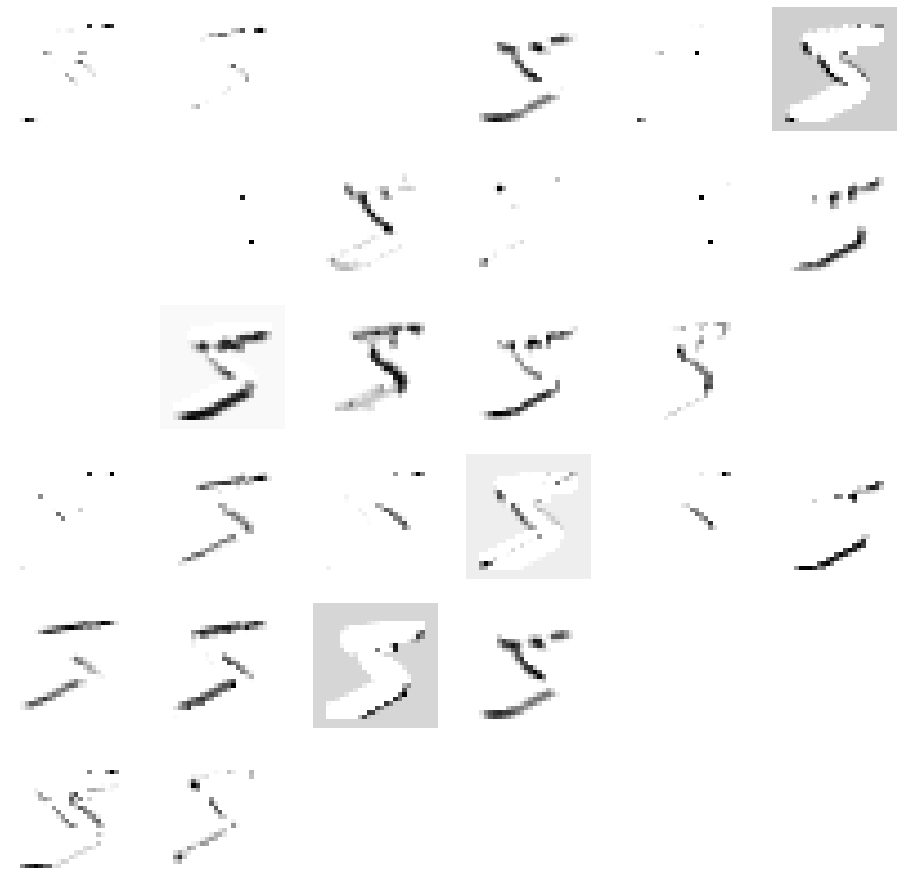

In [ ]:
print("")
print("Cnn Map images layer 1")
print("")

plt.figure(figsize=(16,16))
for i in range(32):
  plt.subplot(6,6,i+1)
  plt.imshow(Cnn_featureMap_L1[:,:,:,i].reshape(28,28),cmap='binary')
  plt.axis('off')
plt.show()


Cnn Map images layer 2



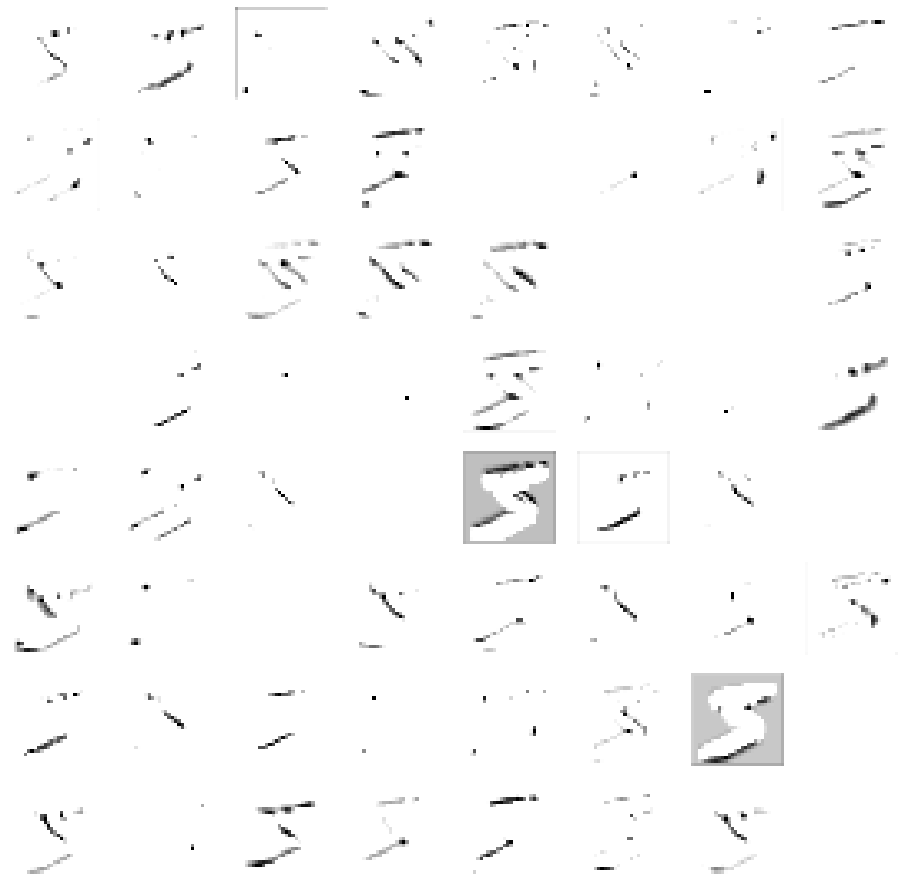

In [ ]:
print("")
print("Cnn Map images layer 2")
print("")

plt.figure(figsize=(16,16))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(Cnn_featureMap_L2[:,:,:,i].reshape(28,28),cmap='binary')
  plt.axis('off')
plt.show()


Cnn Map images layer 3



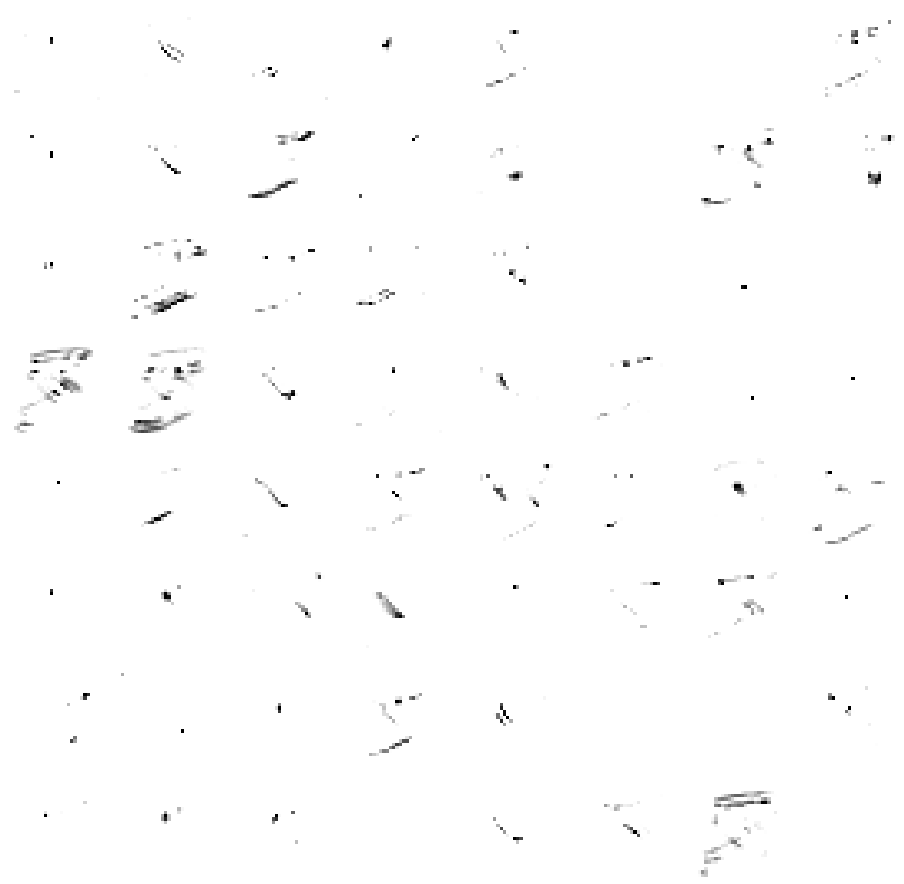

In [ ]:
print("")
print("Cnn Map images layer 3")
print("")

plt.figure(figsize=(16,16))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(Cnn_featureMap_L3[:,:,:,i].reshape(28,28),cmap='binary')
  plt.axis('off')
plt.show()